In [1]:
from matplotlib.pyplot import *
% matplotlib inline
from numpy import *
from astropy.io import ascii
import DragScriptV2 as DS

In [2]:
avionics = 0.211
#rocket = 4.49+0.449-0.211####mass has been adjusted
rocket = 5.0-0.211
dry_motor = 1.264 - 0.745
wet_motor = 1.264

print rocket + avionics

5.0


In [3]:
thrust_profile = 'K535_thrust.txt'
rocket_mass = avionics+rocket  #kg
time_res = 0.001
motor_mass = dry_motor
propellant_mass = wet_motor - dry_motor
burn_time = 2.8 # sec
temp = 10.   # Density of air varies with temperature


print rocket_mass + motor_mass  + propellant_mass
print rocket_mass + motor_mass

max_deploy = 41.22  #percentage opening


t_deploy = 1 #how long it takes to deploy
t_start = 1 # after MECO

drag_f = 1.25


6.264
5.519


MECO at 2.8 sec, at 329.07 m
Apogee at 17.89 sec, at 1614.1 m
MECO at 198.68 m/s


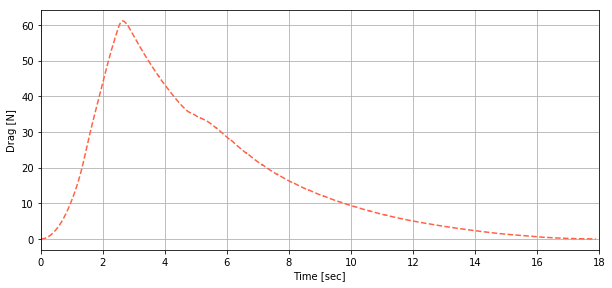

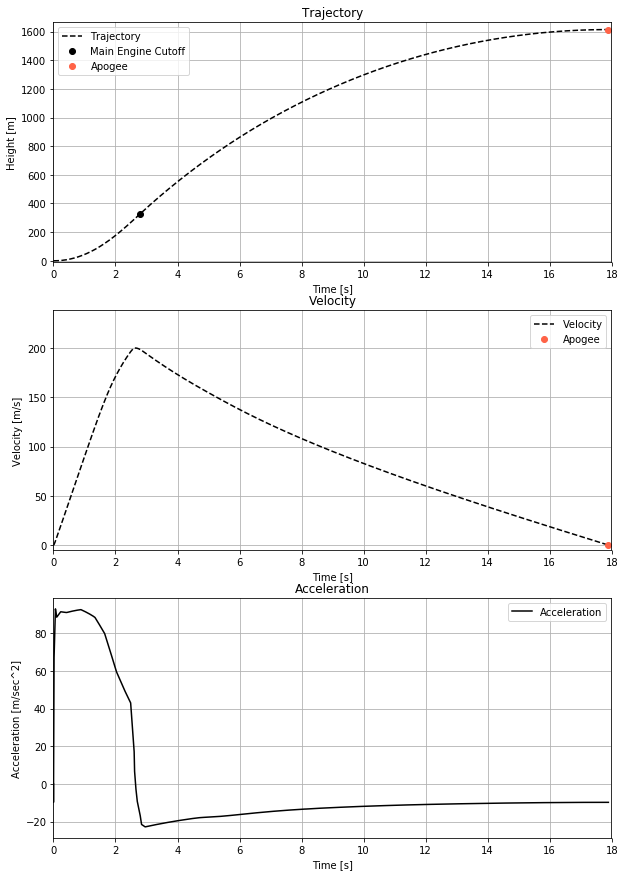

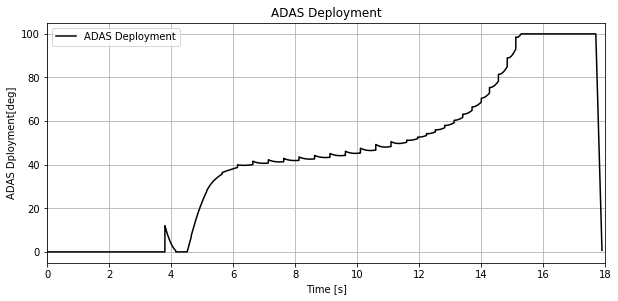

In [4]:
time, velocity, acceleration, height, mass, ADAS, apogee, MECO_vel, MECO_index = DS.KPD(thrust_profile, rocket_mass, motor_mass, propellant_mass, time_res, temp, burn_time, max_deploy, t_start, t_deploy, 1, drag_f)

In [5]:
index_test = 2150
print height[index_test]
print velocity[index_test]

[ 203.16668509]
[ 179.95799851]


In [6]:
index_test = 3200
print height[index_test]
print velocity[index_test]

[ 406.80388718]
[ 189.8540347]


In [7]:
index_test = 4300
print height[index_test]
print velocity[index_test]

[ 603.03477629]
[ 167.48914692]


In [8]:
index_test = 5600
print height[index_test]
print velocity[index_test]

[ 805.53541421]
[ 144.3988737]


In [9]:
index_test = 7100
print height[index_test]
print velocity[index_test]

[ 1004.00495405]
[ 120.81413563]


In [10]:
index_test = 9000
print height[index_test]
print velocity[index_test]

[ 1208.61729669]
[ 95.16755621]


In [11]:
index_test = 11500
print height[index_test]
print velocity[index_test]

[ 1408.87488799]
[ 65.63537983]


In [12]:
index_test = 16500
print height[index_test]
print velocity[index_test]

[ 1604.58237767]
[ 13.68307315]


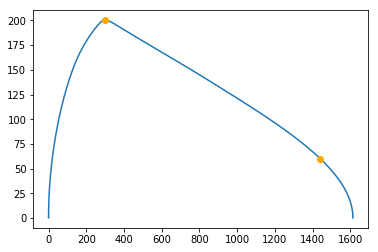

In [13]:
figure()

top_index = velocity.index(max(velocity))
near_top = 12000



plot (height, velocity)
plot (height[top_index], velocity[top_index], 'o', color = 'orange')
plot (height[near_top], velocity[near_top], 'o', color = 'orange')

In [14]:
new_height = [] #new array not of arrays
new_velocity = []
for i in range (0, len(height)-1):
    if type(height[i]) == float:
        new_height.append(height[i])
    if type(height[i]) == ndarray:
        new_height.append(height[i][0])
        
for i in range (0, len(velocity)-1):
    if type(velocity[i]) == float:
        new_velocity.append(velocity[i])
    if type(velocity[i]) == ndarray:
        new_velocity.append(velocity[i][0])
        
height = new_height
velocity = new_velocity

In [15]:
def function_value(order, function, x_value):
    function_value = 0
    index = 0
    while index<=order:
        function_value = function_value + function[index]*x_value**(order-index)
        index = index + 1
    return function_value

def get_func(order, function):
    arr = []
    for i in range(0, len(height)):
        arr.append(function_value(order, function, height[i]))
    return arr

In [16]:
print "Heights at"
print "Top index: ", height[top_index]
print "Near top: ", height[near_top]

Heights at
Top index:  298.123425826
Near top:  1440.3106819


298.0 , 
396.0 , 
489.0 , 
577.0 , 
660.0 , 
738.0 , 
812.0 , 
882.0 , 
948.0 , 
1009.0 , 
1068.0 , 
1123.0 , 
1174.0 , 
1222.0 , 
1267.0 , 
1310.0 , 
1349.0 , 
1385.0 , 
1418.0 , 


C:\Anaconda\lib\site-packages\ipykernel_launcher.py:40: RankWarning: Polyfit may be poorly conditioned


'\nfigure(figsize=(10, 15))\nplot (height[near_top:-1], difference_three_arr)\n'

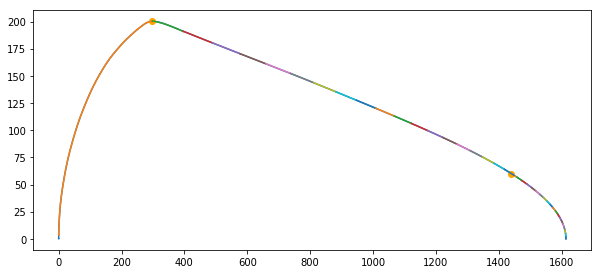

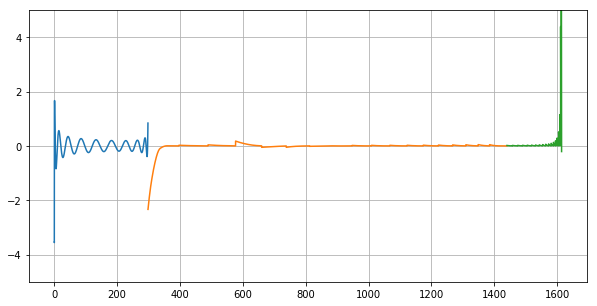

In [17]:
order_of_f_section1 = 20
order_of_f_section2 = 2
order_of_f_section3 = 2


#divide each range up into a whole load of function

#section 2
length_of_run2 = 500
index = 0
function_sec_2 = []
while index*length_of_run2+top_index < near_top:
    if((index+1)*length_of_run2+top_index) < near_top:
        last_index = ((index+1)*length_of_run2+top_index)
    else:
        last_index = near_top
    function_sec_2.append(polyfit(height[top_index+index*length_of_run2:last_index], velocity[top_index+index*length_of_run2:last_index], order_of_f_section2))
    print round(height[top_index+index*length_of_run2],0), ", "
    index = index + 1

#section 3

#number of points per function
length_of_run = 300
index = 0
function_sec_3 = []
while index*length_of_run+near_top < len(height):
    if((index+1)*length_of_run+near_top) < len(height):
        last_index = ((index+1)*length_of_run+near_top)
    else:
        last_index = len(height)-1
    function_sec_3.append(polyfit(height[near_top+index*length_of_run:last_index], velocity[near_top+index*length_of_run:last_index], order_of_f_section3))
    index = index + 1
    
'''
for i in range (0, len(function_sec_2)):
     print "{",function_sec_2[i][0],", ",function_sec_2[i][1],", ",function_sec_2[i][2],"}"
'''
    
function_one = polyfit(height[:top_index], velocity[:top_index], order_of_f_section1)
#function_two = polyfit(height[top_index:near_top], velocity[top_index:near_top], order_of_f_section2)

#print function_two

graph_one = []
#graph_two = []
graph_sec_2 = []
graph_sec_3 = []


for func in range (0, len(function_sec_3)):
    graph_sec_3.append(get_func(order_of_f_section3, function_sec_3[func]))
    
for func in range (0, len(function_sec_2)):
    graph_sec_2.append(get_func(order_of_f_section2, function_sec_2[func]))
    
graph_one = get_func(order_of_f_section1, function_one)
#graph_two = get_func(order_of_f_section2, function_two)
    

figure(figsize=(10, 15))
subplot(3,1,1)

plot (height, velocity)
plot (height[top_index], velocity[top_index], 'o', color = 'orange')
plot (height[near_top], velocity[near_top], 'o', color = 'orange')

#plot the graphs


for i in range (0, len(graph_sec_3)):
    plot (height[near_top+i*length_of_run:near_top+(i+1)*length_of_run], graph_sec_3[i][near_top+(i)*length_of_run:near_top+(i+1)*length_of_run])
plot (height[:top_index], graph_one[:top_index])
#plot (height[top_index:near_top], graph_two[top_index:near_top])

for i in range (0, len(graph_sec_2)):
    plot (height[top_index+i*length_of_run2:top_index+(i+1)*length_of_run2], graph_sec_2[i][top_index+(i)*length_of_run2:top_index+(i+1)*length_of_run2])



#plot the difference between the model and the line of best fit
#sections 2
index = 0
func = 0   #the current function being used
difference_two_arr = []
while index < near_top-top_index-1:
    if index%length_of_run2 == 0:
        func = func+1
    if func == len(graph_sec_2):
        func = len(graph_sec_2)-1
    difference_two_arr.append(velocity[index+top_index]-graph_sec_2[func][index+top_index])
    index = index + 1



#section 3
index = 0
func = 0   #the current function being used
difference_three_arr = []
while index<len(height)-near_top-1:
    if index%length_of_run == 0:
        func = func+1
    if func == len(graph_sec_3):
        func = len(graph_sec_3)-1
    difference_three_arr.append(velocity[index+near_top]-graph_sec_3[func][index+near_top])
    index = index + 1

figure(figsize=(10, 5))

difference_one = array(velocity)-array(graph_one)
#difference_two = array(velocity)-array(graph_two)
grid()
plot (height[:top_index], difference_one[:top_index])
plot (height[top_index:near_top-1], difference_two_arr)
plot (height[near_top:-1], difference_three_arr)
ylim(-5,5)

'''
figure(figsize=(10, 15))
plot (height[near_top:-1], difference_three_arr)
'''

So fitting lines seems to be too computational. But we will have to do this unles if we can get a simple interpolator going. The full arrays take up about 140 kilobytes which I think is too much, so I will try to choose more scarce data points in the begining when the motor is burning and during the main coast phase where the graph is mainly flat, and then a lot of data points towards the end where the graph is changing steepness

236


(1435.3106819027089, 1619.0968832131487)

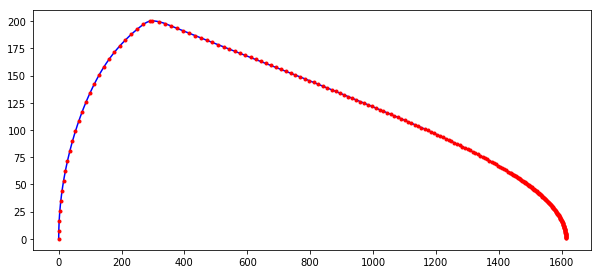

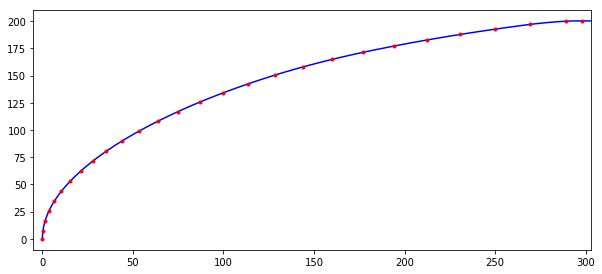

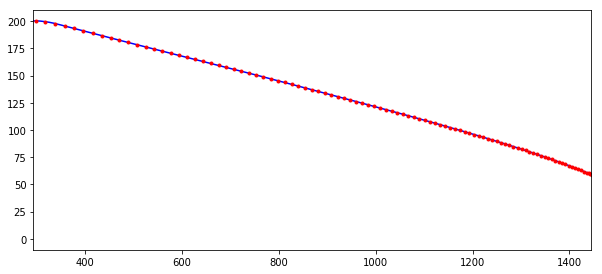

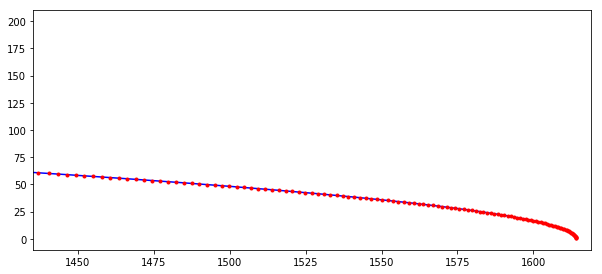

In [18]:
burn_phase_scatter = 100
first_coast_phase_scatter = 100
final_phase_scatter = 50
print len(height[:top_index])/burn_phase_scatter + len(height[top_index:near_top])/first_coast_phase_scatter + len(height[near_top:])/final_phase_scatter

#make a new arrays with scarced data
new_height_arr = []
new_vel_arr = []
for index in range (0, len(height[:top_index])):
    if index%burn_phase_scatter == 0:
        new_height_arr.append(height[index])
        new_vel_arr.append(velocity[index])
for index in range (0, near_top-top_index):
    if index%first_coast_phase_scatter == 0:
        new_height_arr.append(height[index+top_index])
        new_vel_arr.append(velocity[index+top_index])
for index in range (0, len(height)-near_top):
    if index%final_phase_scatter == 0:
        new_height_arr.append(height[index+near_top])
        new_vel_arr.append(velocity[index+near_top])
        
figure(figsize=(10, 15))
subplot(3,1,1)
plot (height, velocity, '-', color = 'blue')
plot (new_height_arr, new_vel_arr, '.', color = 'red')

figure(figsize=(10, 15))
subplot(3,1,1)
plot (height, velocity, '-', color = 'blue')
plot (new_height_arr, new_vel_arr, '.', color = 'red')
xlim(-5,height[top_index]+5)

figure(figsize=(10, 15))
subplot(3,1,1)
plot (height, velocity, '-', color = 'blue')
plot (new_height_arr, new_vel_arr, '.', color = 'red')
xlim(height[top_index]-5,height[near_top]+5)

figure(figsize=(10, 15))
subplot(3,1,1)
plot (height, velocity, '-', color = 'blue')
plot (new_height_arr, new_vel_arr, '.', color = 'red')
xlim(height[near_top]-5,height[-1]+5)
